In [195]:
import numpy as np
import math as mt
import matplotlib.pyplot as plt
import time

## DTFD


A **Transformada de Fourier de Tempo Discreto** (DTFD) é uma transformada integral que é realizada sobre uma função, cuja variável independente é discreta, ou seja, uma análise de Fourier em uma sequência discreta. Usa-se para analizar/avaliar amostras de sinais contínuos onde a distância entre uma amostra e outra é o próprio tempo de amostragem. Matematicamente temos:

$$ 
X(e^{j\omega})=\sum_{n=-\infty}^{\infty} x(n)e^{-j\omega n}
$$

Note que ao analizar $X(e^{j(\omega+ 2\pi)})$ tem-se:
$$
X(e^{j(\omega+ 2\pi)})=\sum_{n=-\infty}^{\infty} x(n)e^{-j(\omega+2\pi) n}
$$

$$
X(e^{j(\omega+ 2\pi)})=\sum_{n=-\infty}^{\infty} x(n)e^{-j\omega n}e^{-j 2\pi n}
$$

Como $n \in \mathbb{Z}$, então $e^{-j 2\pi n} = 1, \forall n$. Pode-se concluir então que:

$$
X(e^{j(\omega+ 2\pi)})=X(e^{j\omega})=\sum_{n=-\infty}^{\infty} x(n)e^{-j\omega n}
$$

Ou seja, a DTFD de um sinal amostrado qualquer (sequência discreta) sempre é periódica. A seguir é feito um código que consegue calcular a DTFD de um sinal qualquer $x(n)$.

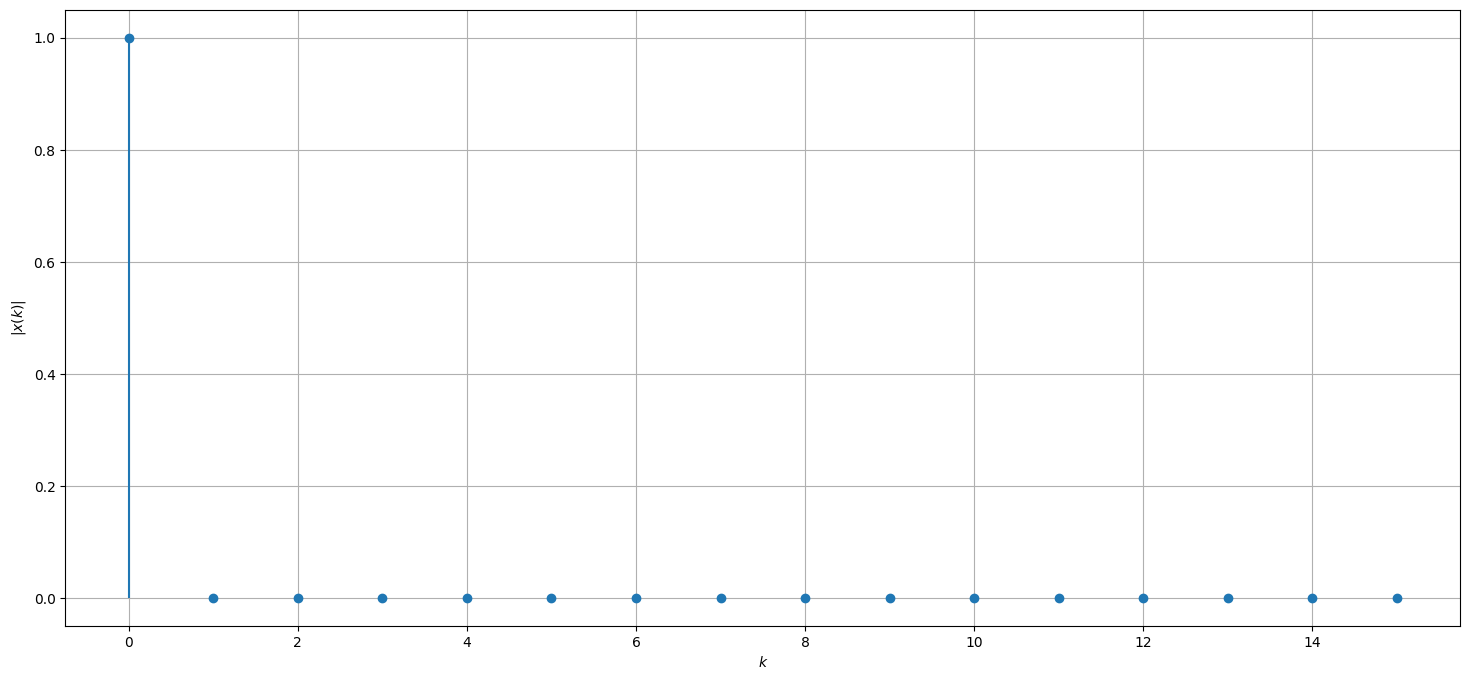

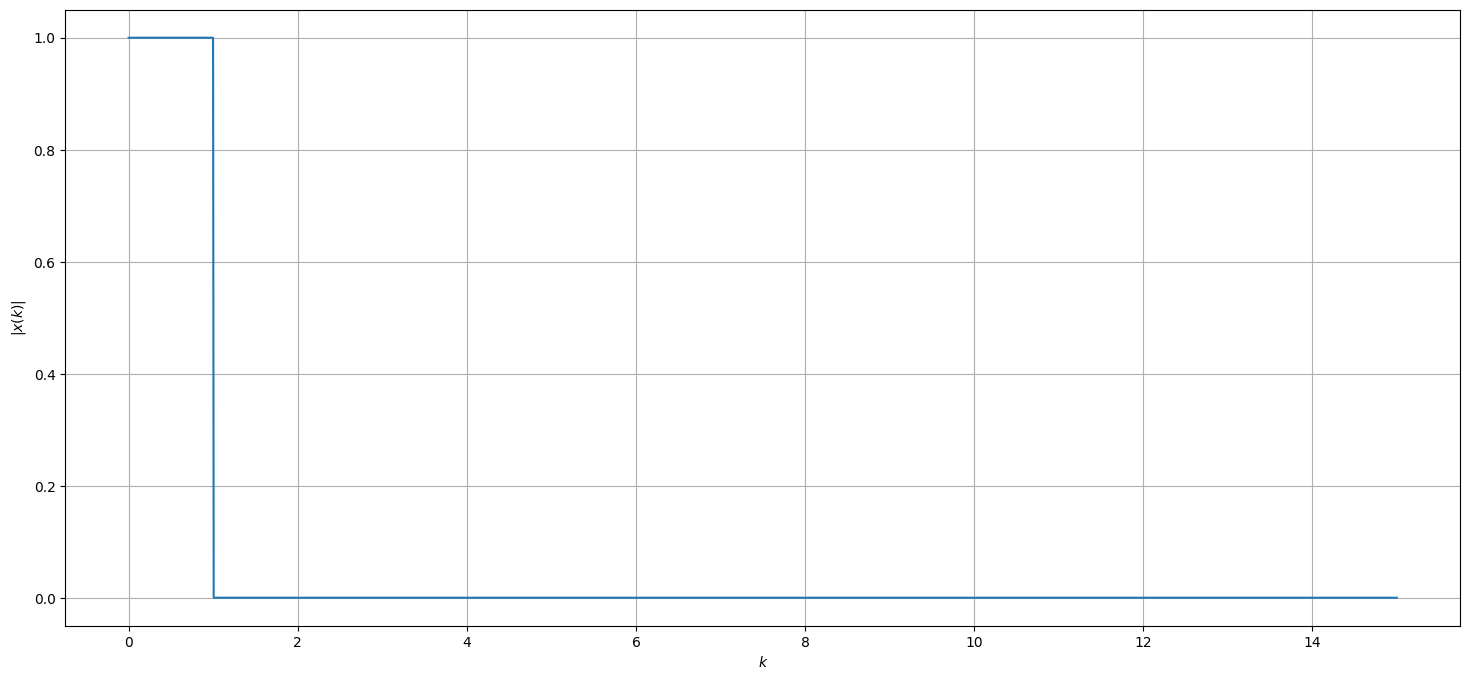

In [196]:
def porta_amostrada(x_min,x_max,amp, x0,xf):
    x = np.arange(x0,xf+1,1)
    funcao = ((x<(x_max+1)) & (x>(x_min-1)))*amp
    return x, funcao

def porta(x_min,x_max,amp, x0,xf):
    x = np.linspace(x0,xf,2000)
    funcao = ((x<(x_max+1)) & (x>(x_min-1)))*amp
    return x, funcao

def cos_amostrado(frequencia_sinal,frequencia_amostragem):
    x = np.arange(0,3/frequencia_sinal,1/(frequencia_amostragem))

    funcao = np.cos(2*np.pi*frequencia_sinal*x)
    return x, funcao

def cos(frequencia_sinal):
    x = np.linspace(0,(3/frequencia_sinal),2000)
    funcao = np.cos(2*np.pi*frequencia_sinal*x)
    return x, funcao

# x, y =cos_amostrado(40, 240)
# x_continuo, y_continuo = cos(40)

x, y =porta_amostrada(0,0,1,0,15)
x_continuo, y_continuo =porta(0,0,1,0,15)

plt.figure( figsize=(18,8))
(markerline, stemlines, baseline) = plt.stem(x, y)
plt.xlabel("$k$")
plt.ylabel("$|x(k)|$")
plt.grid(True)
baseline.set_visible(False)

plt.figure( figsize=(18,8))
plt.plot(x_continuo, y_continuo)
plt.xlabel("$k$")
plt.ylabel("$|x(k)|$")
plt.grid(True)
baseline.set_visible(False)



In [197]:
def dtfd(function):

    #omega entre -2pi e 2pi
    omega = np.linspace(0,2*np.pi, 50000)

    #somatorio da transformada de fourier de tempo discreto
    soma = np.zeros_like(omega, dtype=complex)
    for i in range(len(function)):
        exp = np.exp(-1j*omega*i)
        soma = soma + function[i]*exp

    return omega, soma

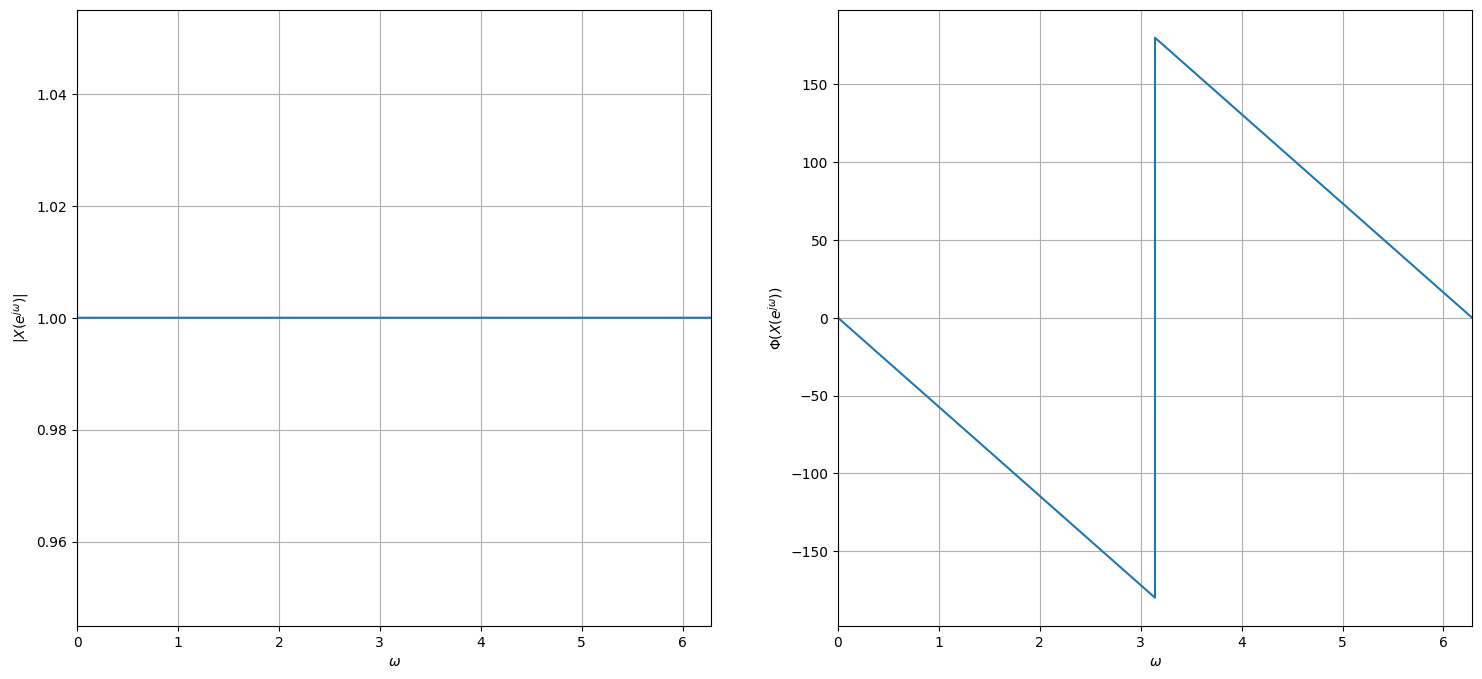

In [198]:
x, y =porta_amostrada(1,1,1,0,15)

# x, y = cos_amostrado(40,240)

freq, soma = dtfd(y)

figure,axis = plt.subplots(1,2, figsize=(18,8))
axis[0].plot(freq, abs(soma))
axis[0].set_xlim(min(freq),max(freq))
axis[0].set_xlabel("$\omega$")
axis[0].set_ylabel("$|X(e^{j\omega})|$")
axis[0].grid(True)

axis[1].plot(freq, np.angle(soma)*180/np.pi)
axis[1].set_xlim(min(freq),max(freq))
axis[1].set_xlabel("$\omega$")
axis[1].set_ylabel("$\Phi(X(e^{j\omega}))$")
axis[1].grid(True)


## DFT

A **Transformada Discreta de Fourier** (DFT) é proveniente da DTFD. Note que o sinal $x(n)$ exemplificado no código acima já havia passado pelo processo de amostragem, porém seu espectro é contínuo. Computacionalmente, é necessário amostrar o espectro, visto que a análise espectral é realizada por meio de um processador digital. 

Portanto, tomando $N$ amostras no espectro igualmente espaçadas em $\frac{2\pi}{N}$ pode-se representar a DFT por:

$$
\hat{x}(k) = \sum_{n=0}^{N-1} x(n) e^{-j 2k\pi n/N }
$$

Onde $\hat{x}(k)$ é a DFT; $N$ é a quantidade de amostras do espectro. $N$ deve ser sempre maior que a quantidade de $x(n)$ e deve ser potência de 2.

Para facilitar a implementação computacional, a DFT pode ainda ser representada matricialmente. Segue abaixo:

$$
\begin{bmatrix}
\hat{x}(0) \\
\hat{x}(1) \\
\hat{x}(2) \\
\vdots \\
\hat{x}(N-1)
\end{bmatrix}
=
\begin{bmatrix}
1 & 1 & 1 & \cdots & 1 \\
1 & \omega_N & \omega_N^2 & \cdots & \omega_N^{N-1} \\
1 & \omega_N^2 & \omega_N^4 & \cdots & \omega_N^{2(N-1)} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & \omega_N^{N-1} & \omega_N^{2(N-1)} & \cdots & \omega_N^{(N-1)^2}
\end{bmatrix}
\begin{bmatrix}
x(0) \\
x(1) \\
x(2) \\
\vdots \\
x(N-1)
\end{bmatrix}
$$

onde $\omega_{N} = e^{-2\pi j / N}$.

In [199]:
def DFT(y, N):

    k = np.arange(0, N, 1)
    #Zero padding em x(n)
    if(len(y)<N):
        zeros = N - len(y)
        y = np.append(y,np.zeros(zeros))
    
    #Exponencial da DFT
    Wn = np.exp(-2j*np.pi/N)

    #Matriz DFT inicialmente preenchida com zeros
    matriz_DFT = np.zeros([N,N],dtype=complex)

    #Construcao da matriz DFT
    for i in range(N):
        for j in range(N):
            matriz_DFT[i][j]=Wn**((i)*(j))

    #Matriz DFT multiplicada por a matriz x(n)
    DFT = matriz_DFT @ y
    return k,DFT

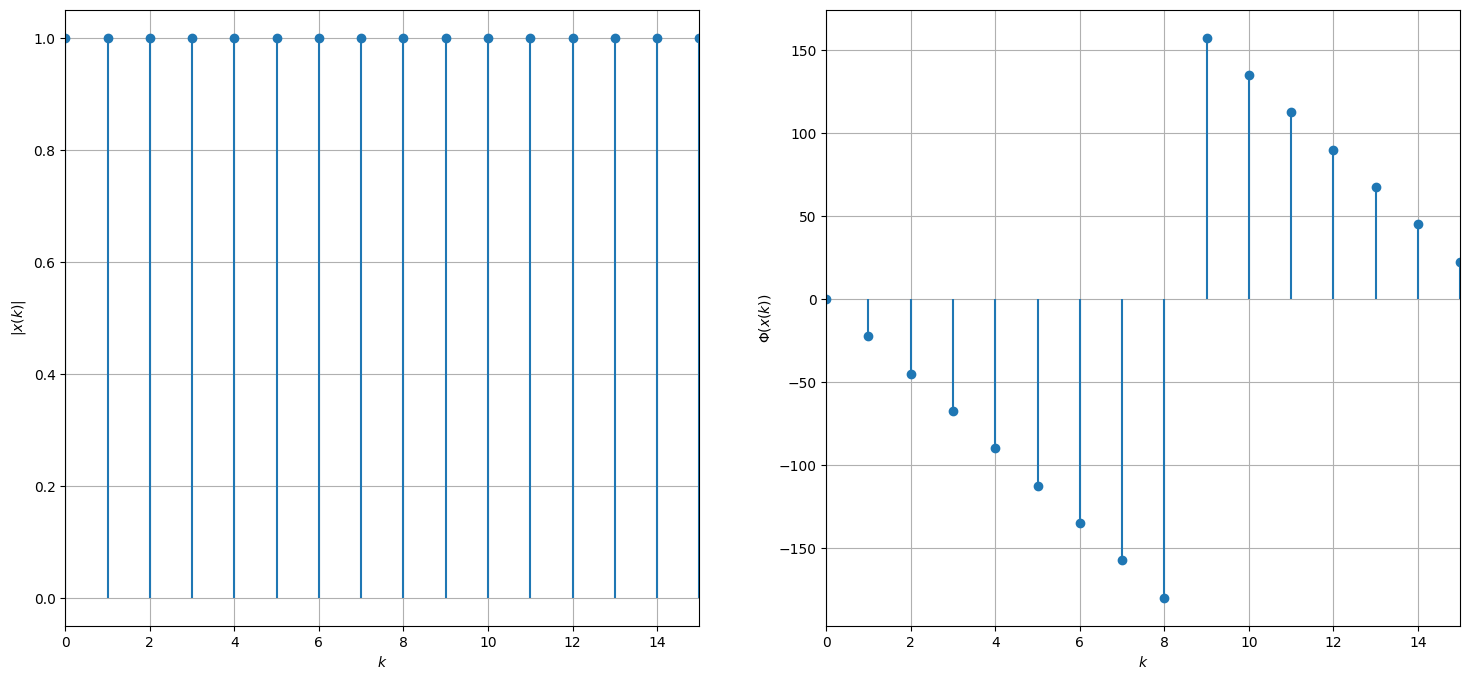

In [200]:
from scipy.fft import fft

x, y =porta_amostrada(1,1,1,0,15)
# x, y = cos_amostrado(40,240)

fourier = fft(y)

figure,axis = plt.subplots(1,2, figsize=(18,8))
(markerline, stemlines, baseline) = axis[0].stem(x, (abs(fourier)))
axis[0].set_xlim(min(x),max(x))
axis[0].set_xlabel("$k$")
axis[0].set_ylabel("$|x(k)|$")
axis[0].grid(True)
baseline.set_visible(False)

(markerline, stemlines, baseline) = axis[1].stem(x, (np.angle(fourier)*180/np.pi))
axis[1].set_xlim(min(x),max(x))
axis[1].set_xlabel("$k$")
axis[1].set_ylabel("$\Phi(x(k))$")
axis[1].grid(True)
baseline.set_visible(False)

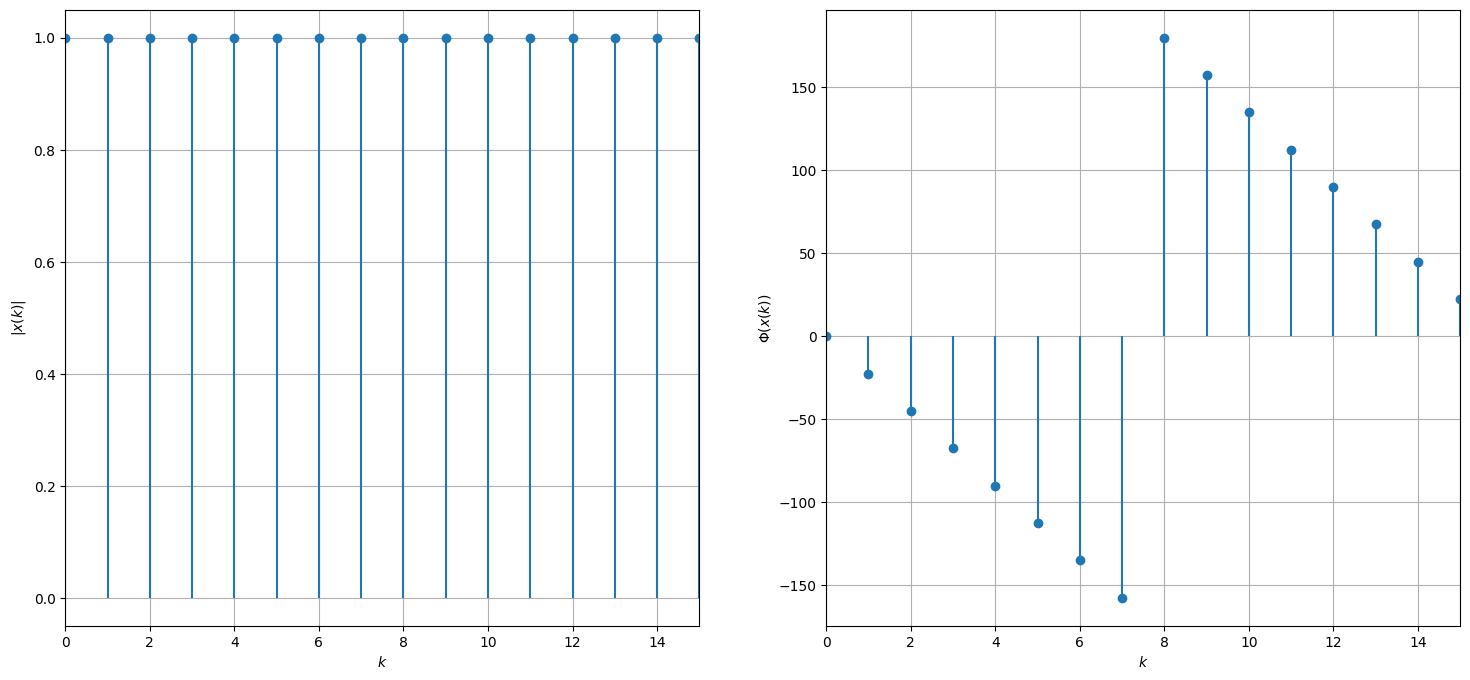

In [201]:
x, y =porta_amostrada(1,1,1,0,15)
# x, y = cos_amostrado(40,240)
x, dft = DFT(y,2**4)

figure,axis = plt.subplots(1,2, figsize=(18,8))
(markerline, stemlines, baseline) = axis[0].stem(x, (abs(dft)))
axis[0].set_xlim(min(x),max(x))
axis[0].set_xlabel("$k$")
axis[0].set_ylabel("$|x(k)|$")
axis[0].grid(True)
baseline.set_visible(False)

(markerline, stemlines, baseline) = axis[1].stem(x, (np.angle(dft)*180/np.pi))
axis[1].set_xlim(min(x),max(x))
axis[1].set_xlabel("$k$")
axis[1].set_ylabel("$\Phi(x(k))$")
axis[1].grid(True)
baseline.set_visible(False)

## Tempo gasto para execução do algoritmo

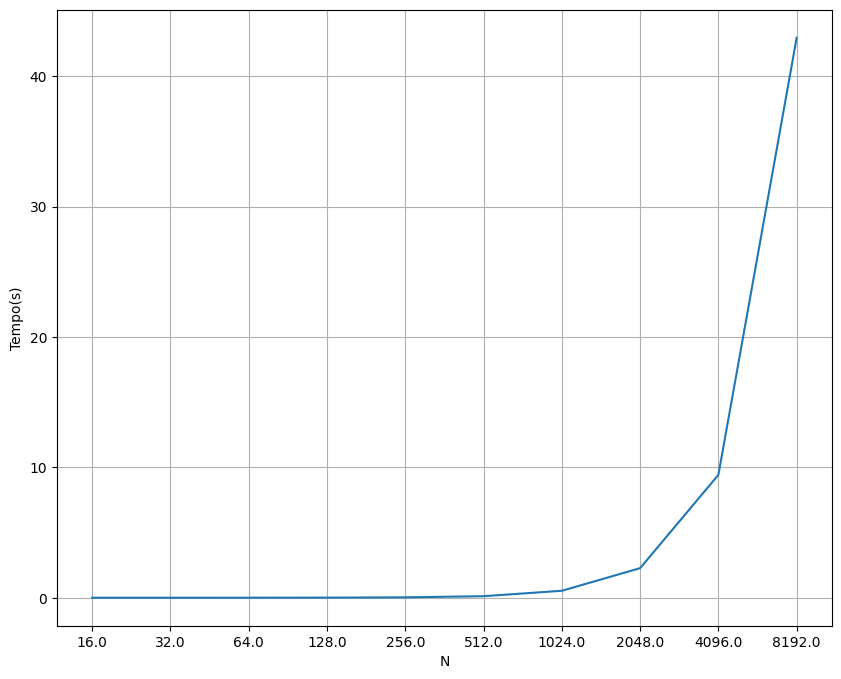

In [202]:
x, y =porta_amostrada(1,8,1,0,10)

# aproximacao para cima de 2^aprox.
# Se o sinal tem tamanho 12, a potencia de dois mais proxima eh 16 = 2^5. Aprox = 5
aprox = mt.ceil(np.log2(len(x)))

# Devido limitacao em meu pc, so consigo calcular a DFT ate N = 2^13
potencia_max = 13

# para o sinal de tamanho 12, onde a potencia de 2 aproximada para cima eh 2^5, entao so consigo simular de N=5 ate N=13
qtd_testes = potencia_max - aprox


vetor_N = np.array([])
vetor_tempo = np.array([])

for i in range (qtd_testes+1):

    #tempo imediatamente antes de executar a DFT
    inicio = time.time()

    x_new,dft = DFT(y,2**(aprox+i))
    #tempo imediatamente depois de executar a DFT
    final = time.time()

    vetor_tempo = np.append(vetor_tempo, final-inicio)
    vetor_N=np.append(vetor_N,2**(i+aprox))

plt.figure(figsize=(10,8))
plt.plot(vetor_N,vetor_tempo)
plt.xscale('log', base=2)
plt.xticks(vetor_N, [str(val) for val in vetor_N])  
plt.xlabel("N")
plt.ylabel("Tempo(s)")
plt.grid(True)